In [60]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 60)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [63]:
import pandas as pd

wildfire_df = pd.read_csv("data/raw/california-wildfires/b8aeb030-140d-43d2-aa29-1a80862e3d62.csv", low_memory=False)
display(wildfire_df)


,_id,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)","Street Suffix (e.g. apt. 23, blding C)",* City,State,Zip Code,* CAL FIRE Unit,County,Community,Battalion,* Incident Name,Incident Number (e.g. CAAEU 123456),Incident Start Date,Hazard Type,If Affected 1-9% - Where did fire start?,If Affected 1-9% - What started fire?,Structure Defense Actions Taken,* Structure Type,Structure Category,# Units in Structure (if multi unit),# of Damaged Outbuildings < 120 SQFT,# of Non Damaged Outbuildings < 120 SQFT,* Roof Construction,* Eaves,* Vent Screen,* Exterior Siding,* Window Pane,* Deck/Porch On Grade,* Deck/Porch Elevated,* Patio Cover/Carport Attached to Structure,* Fence Attached to Structure,Distance - Propane Tank to Structure,Distance - Residence to Utility/Misc Structure &gt; 120 SQFT,Fire Name (Secondary),APN (parcel),Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),GLOBALID,Latitude,Longitude,x,y
0,1,1,No Damage,8376.0,Quail Canyon,Road,NaN,Winters,CA,NaN,LNU,Solano,NaN,8,Quail,CALNU 008419,6/6/2020 12:00:00 AM,Fire,NaN,NaN,NaN,Single Family Residence Multi Story,Single Residence,1.0,NaN,NaN,Asphalt,Unenclosed,"Mesh Screen <= 1/8""""",Wood,Single Pane,Wood,Wood,No Patio Cover/Carport,No Fence,NaN,NaN,Quail,0101090290,510000.0,1997.0,8376 QUAIL CANYON RD VACAVILLE CA 95688,e1919a06-b4c6-476d-99e5-f0b45b070de8,38.474960,-122.044465,-1.358593e+07,4.646741e+06
1,2,2,Affected (1-9%),8402.0,Quail Canyon,Road,NaN,Winters,CA,NaN,LNU,Solano,NaN,NaN,Quail,CALNU 008419,6/6/2020 12:00:00 AM,Fire,Deck on Grade,Unknown,Hand Crew Fuel Break,Single Family Residence Single Story,Single Residence,NaN,NaN,NaN,Asphalt,Unenclosed,"Mesh Screen <= 1/8""""",Wood,Multi Pane,Masonry/Concrete,No Deck/Porch,No Patio Cover/Carport,Combustible,NaN,NaN,Quail,0101090270,573052.0,1980.0,8402 QUAIL CANYON RD VACAVILLE CA 95688,b090eeb6-5b18-421e-9723-af7c9144587c,38.477442,-122.043252,-1.358579e+07,4.647094e+06
2,3,3,No Damage,8430.0,Quail Canyon,Road,NaN,Winters,CA,NaN,LNU,Solano,NaN,NaN,Quail,CALNU 008419,6/6/2020 12:00:00 AM,Fire,NaN,NaN,NaN,Single Family Residence Single Story,Single Residence,NaN,NaN,NaN,Asphalt,Enclosed,"Mesh Screen > 1/8""""",Wood,Single Pane,No Deck/Porch,No Deck/Porch,No Patio Cover/Carport,No Fence,NaN,NaN,Quail,0101090310,350151.0,2004.0,8430 QUAIL CANYON RD VACAVILLE CA 95688,268da70b-753f-46aa-8fb1-327099337395,38.479358,-122.044585,-1.358594e+07,4.647366e+06
3,4,4,No Damage,3838.0,Putah Creek,Road,NaN,Winters,CA,NaN,LNU,Solano,NaN,NaN,Quail,CALNU 008419,6/6/2020 12:00:00 AM,Fire,NaN,NaN,NaN,Single Family Residence Single Story,Single Residence,NaN,NaN,NaN,Asphalt,Unenclosed,"Mesh Screen > 1/8""""",Wood,Single Pane,No Deck/Porch,No Deck/Porch,Combustible,No Fence,NaN,NaN,Quail,0103010240,134880.0,1981.0,3838 PUTAH CREEK RD WINTERS CA 95694,64d4a278-5ee9-414a-8bf4-247c5b5c60f9,38.487313,-122.015115,-1.358266e+07,4.648497e+06
4,5,5,No Damage,3830.0,Putah Creek,Road,NaN,Winters,CA,NaN,LNU,Solano,NaN,NaN,Quail,CALNU 008419,6/6/2020 12:00:00 AM,Fire,NaN,NaN,NaN,Single Family Residence Single Story,Single Residence,NaN,NaN,NaN,Tile,Enclosed,"Mesh Screen > 1/8""""",Wood,Multi Pane,Wood,Wood,Combustible,No Fence,NaN,NaN,Quail,0103010220,346648.0,1980.0,3830 PUTAH CREEK RD WINTERS CA 95694,1b44b214-01fd-4f06-b764-eb42a1ec93d7,38.485636,-122.016122,-1.358277e+07,4.648259e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100225,100226,101217,No Damage,24198.0,Case,Court,blding A,Malibu,CA,90265.0,LAC,Los Angeles,NaN,NaN,Franklin,CALAC 434928,12/9/2024 12:00:00 AM,Fire,NaN,NaN,NaN,Single Family Residence Single Story,Single Residence,0.0,0.0,0.0,Metal,Enclosed,Unknown,Stucco Brick Cement,Multi Pane,Wood,No Deck/Porch,Non Combustible,No Fence,NaN,NaN,NaN,4458018039,2249521.0,0.0,"24198 CASE CT, MALIBU, CA 90265",1b537de2-8b97-4

In [66]:
aqi_df = pd.read_csv("data/raw/us-air-quality/US_AQI.csv", low_memory=False)

neighboring_states = ["CA", "OR", "NV", "AZ"]  # State codes
aqi_neighbors_df = aqi_df[aqi_df["state_id"].isin(neighboring_states)]

aqi_neighbors_df.head()

,Unnamed: 0,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
209,209,10540,2022-01-01,53,Moderate,PM2.5,1,Albany,OR,Oregon,44.6272,-123.0965,66405.0,1190.0,America/Los_Angeles
210,210,10540,2022-01-02,9,Good,PM2.5,1,Albany,OR,Oregon,44.6272,-123.0965,66405.0,1190.0,America/Los_Angeles
211,211,10540,2022-01-03,5,Good,PM2.5,1,Albany,OR,Oregon,44.6272,-123.0965,66405.0,1190.0,America/Los_Angeles
212,212,10540,2022-01-04,6,Good,PM2.5,1,Albany,OR,Oregon,44.6272,-123.0965,66405.0,1190.0,America/Los_Angeles
213,213,10540,2022-01-05,9,Good,PM2.5,1,Albany,OR,Oregon,44.6272,-123.0965,66405.0,1190.0,America/Los_Angeles


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_missing_data_heatmap(df):

    # Create a more informative heatmap
    plt.figure(figsize=(14, 8))

    # Calculate missing data percentage
    missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)

    # Create a dataframe for missing data
    missing_df = pd.DataFrame({'Column': missing_percentage.index,
                              'Missing %': missing_percentage.values})

    # Plot
    sns.heatmap(df[missing_df['Column']].isnull(),
                cbar=False,
                cmap='coolwarm',
                yticklabels=False)
    plt.title('Missing Data Heatmap', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Print missing percentage for reference
    print("\nMissing Data Percentage by Column:")
    display(missing_df)

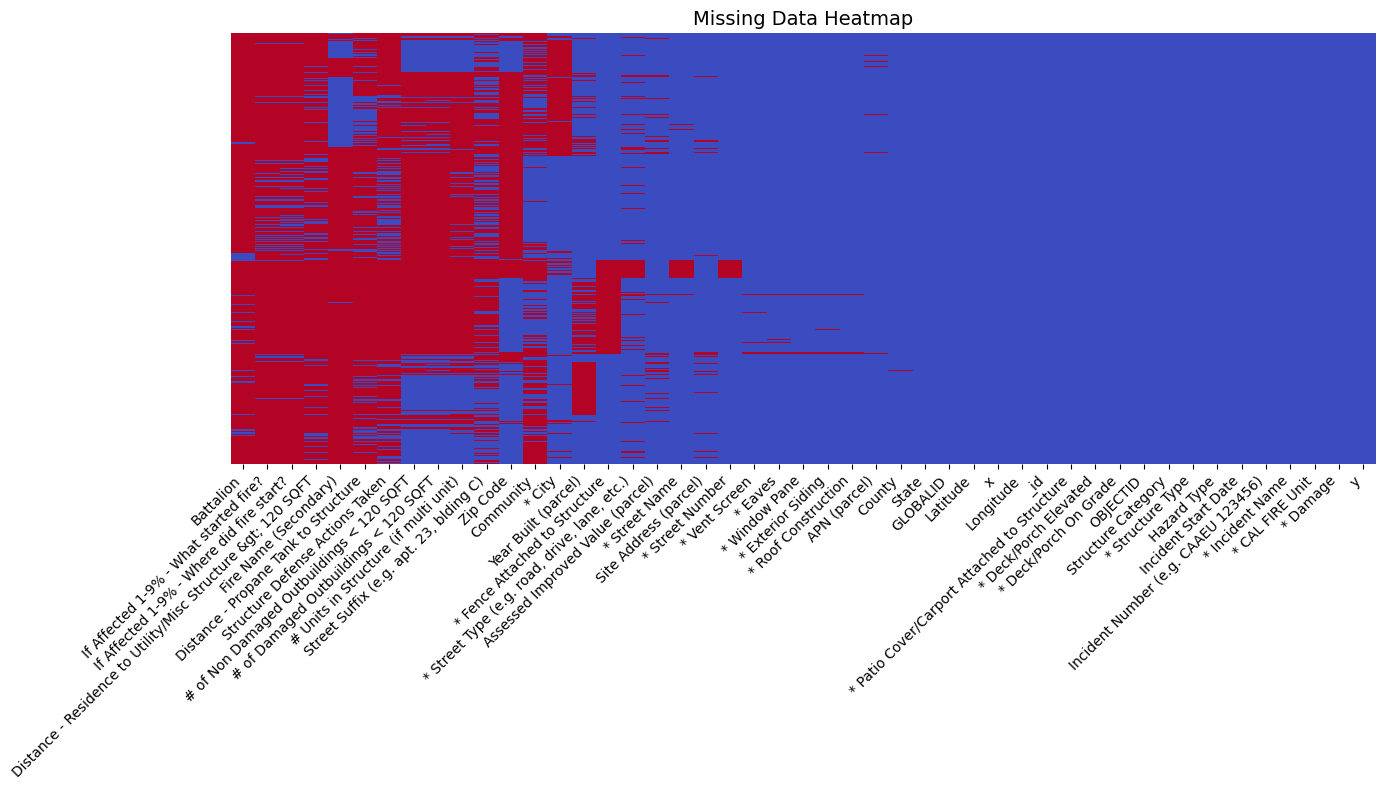


Missing Data Percentage by Column:


,Column,Missing %
0,Battalion,93.616682
1,If Affected 1-9% - What started fire?,91.004689
2,If Affected 1-9% - Where did fire start?,89.284645
3,Distance - Residence to Utility/Misc Structure...,85.676943
4,Fire Name (Secondary),78.877582
5,Distance - Propane Tank to Structure,76.995909
6,Structure Defense Actions Taken,75.586152
7,# of Non Damaged Outbuildings < 120 SQFT,68.998304
8,# of Damaged Outbuildings < 120 SQFT,68.986331
9,# Units in Structure (if multi unit),68.887559


In [50]:
plot_missing_data_heatmap(wildfire_df)

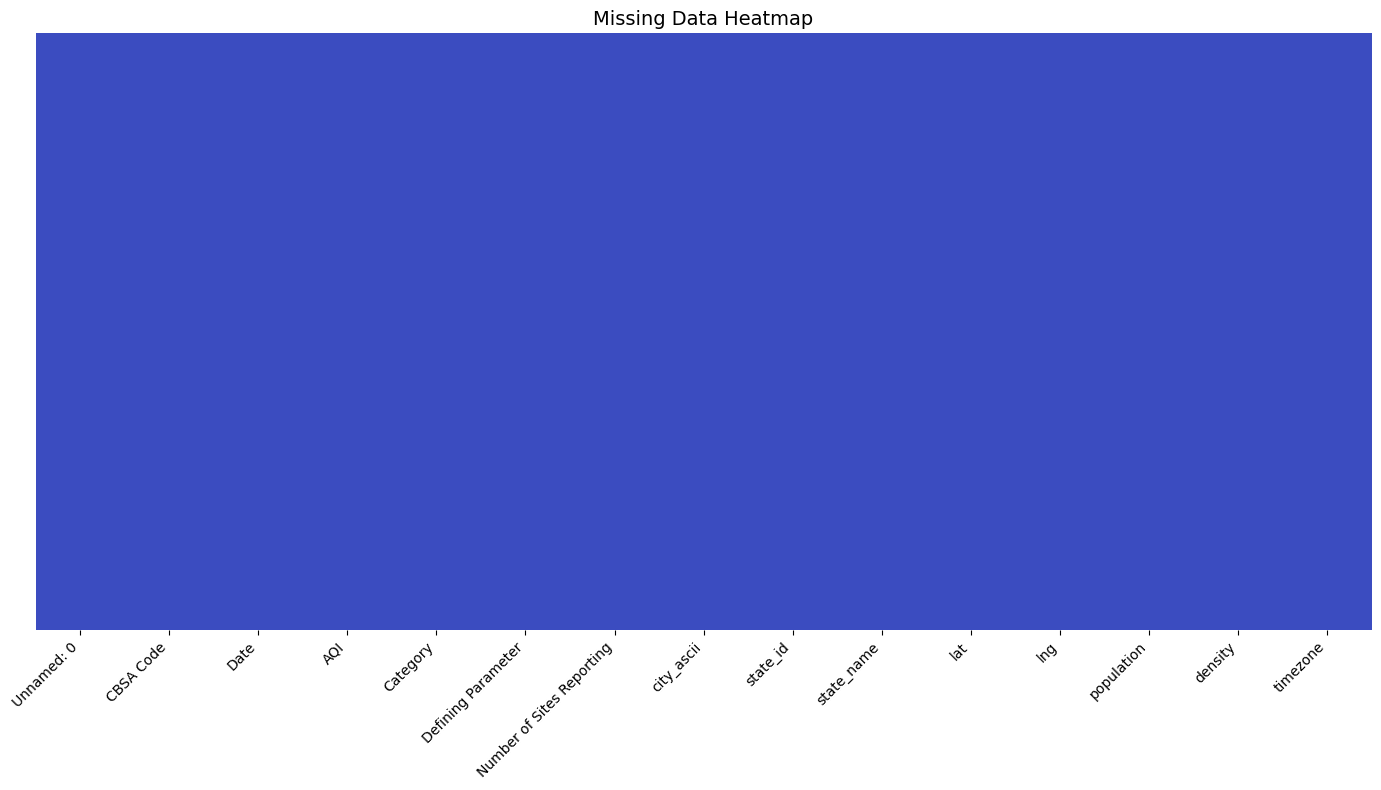


Missing Data Percentage by Column:


,Column,Missing %
0,Unnamed: 0,0.0
1,CBSA Code,0.0
2,Date,0.0
3,AQI,0.0
4,Category,0.0
5,Defining Parameter,0.0
6,Number of Sites Reporting,0.0
7,city_ascii,0.0
8,state_id,0.0
9,state_name,0.0


In [51]:
plot_missing_data_heatmap(aqi_df)